In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [3]:
# data visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier 

In [199]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]

In [34]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What features are categorical?

Survivided
Sex
Embarked

Ordinal: Pclass


What features are numerical?

Continous: Age,Fare; Discrete:SibSp, Parch



What features are mixed data type?

Tickets contains numeric and alphanumeric data;
Cabine is alphanumeric

What features might contain error?

name feature might contain errors or typos

what features might imcomplete?

???? How to tell data missing???

what are the data types for various features?


In [37]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [38]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
# THIS IS TO SEE THE distribution of categorical features!
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Fleming, Miss. Margaret",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [56]:
train_df[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [58]:
train_df[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [59]:
train_df[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


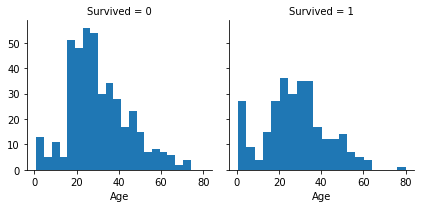

In [62]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

In [67]:
train_df['Age'].isnull().values.any()

True

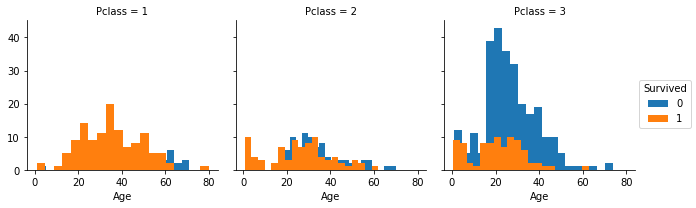

In [71]:
grid=sns.FacetGrid(train_df,col='Pclass',hue='Survived')
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

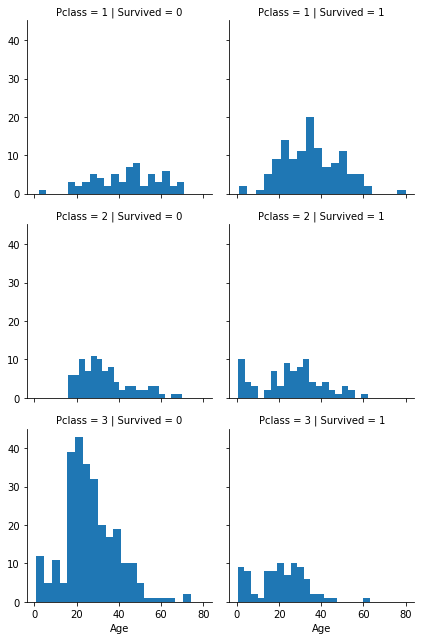

In [70]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass')
grid.map(plt.hist,'Age',bins=20)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


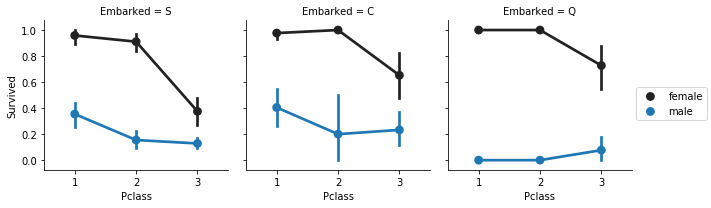

In [85]:
grid=sns.FacetGrid(train_df,col='Embarked')
grid.map(sns.pointplot,'Pclass','Survived','Sex',hue_order=['female','male'])
grid.add_legend()

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


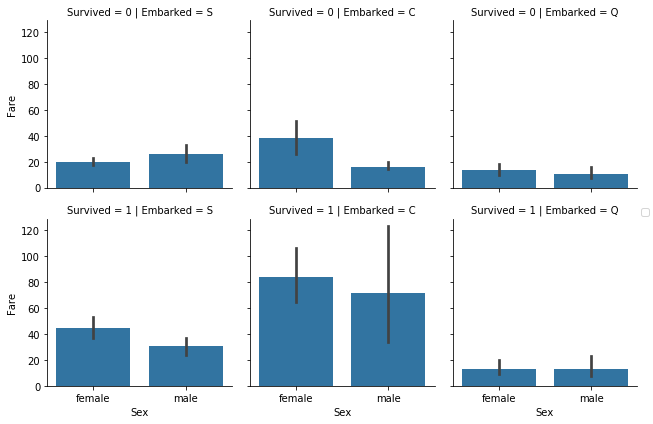

In [99]:
grid=sns.FacetGrid(train_df, row='Survived',col='Embarked')
grid.map(sns.barplot,'Sex','Fare')
grid.add_legend()

Dropping features

In [102]:
print('Before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [200]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)


In [201]:
combine=[train_df,test_df]

In [202]:
'After',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape

('After', (891, 10), (418, 9), (891, 10), (418, 9))

Convert name titles

In [203]:
for x in combine:
    x['Title']=x.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [204]:
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [205]:
for x in combine:
    x['Title']=x['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    x['Title']=x['Title'].replace('Mlle','Miss')
    x['Title']=x['Title'].replace('Ms','Miss')
    x['Title']=x['Title'].replace('Mme','Mrs')

In [206]:
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [207]:
train_df[['Title','Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [208]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for x in combine:
    x['Title']=x['Title'].map(title_mapping)
    x['Title']=x['Title'].fillna(0)

In [209]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [210]:
# drop the name feature and passengerID
train_df=train_df.drop(['Name','PassengerId'],axis=1)

In [211]:
test_df=test_df.drop('Name',axis=1)

In [212]:
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [213]:
combine=[train_df,test_df]

Convert a categorical feature: sex

In [214]:
for x in combine:
    x['Sex']=x['Sex'].map({'female':1,'male':0}).astype(int)

In [215]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


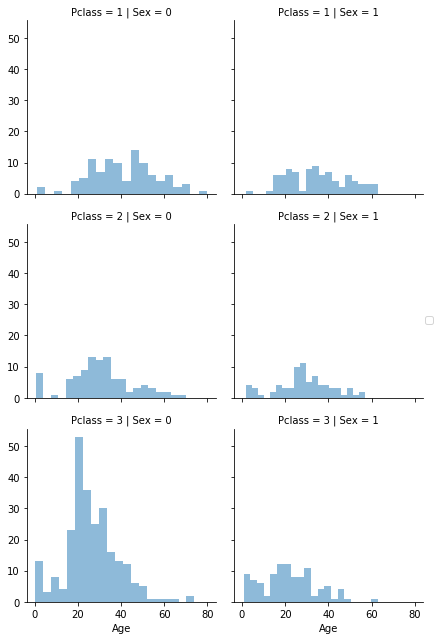

In [216]:
grid=sns.FacetGrid(train_df,col='Sex',row='Pclass',size=3)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [217]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [218]:

# to replace the null value in age column to the median of pclass/gender combination

for x in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=x[(x['Sex']==i)&(x['Pclass']==j+1)]['Age'].dropna()
            
            age_guess=guess_df.median()
            
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
    
    for i in range(0,2):
        for j in range(0,3):
            x.loc[(x.Age.isnull())&(x.Sex==i)&(x.Pclass==j+1),'Age']=guess_ages[i,j]
    
    x['Age']=x['Age'].astype(int)

In [219]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [220]:
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand']).mean()

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


replace the age with ordinals based on the bands

In [221]:
for x in combine:
    x.loc[x['Age']<=16,'Age']=0
    x.loc[(x['Age']>16)&(x['Age']<=32),'Age']=1
    x.loc[(x['Age']>32)&(x['Age']<=48),'Age']=2
    x.loc[(x['Age']>48)&(x['Age']<=64),'Age']=3
    x.loc[x['Age']>64,'Age']=4


In [226]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


In [227]:
train_df=train_df.drop('AgeBand',axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


Create new feature combining existing features!!

In [230]:
for x in combine:
    x['FamilySize']=x['SibSp']+x['Parch']+1
train_df[['FamilySize','Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived',ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


create another feature called isalone

In [232]:
for x in combine:
    x['isalone']=0
    x.loc[x['FamilySize']==1,'isalone']=1

train_df[['isalone','Survived']].groupby('isalone').mean()

,Survived
isalone,
0,0.505650
1,0.303538


drop parch sibsp, familysize

In [233]:
train_df=train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df=test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isalone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


create an artificial feature combine age and pclass

In [241]:
for x in combine:
    x['AgePclass']=x['Age']*x['Pclass']

train_df.loc[:,['AgePclass', 'Age', 'Pclass']].head()

,AgePclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


completing a categorical feature, fill the na value in embarked with the most frequesnt  

In [247]:
freq_port=train_df.Embarked.dropna().mode()[0]

In [248]:
for x in combine:
    x['Embarked']=x['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


converting categorical feature to numeric

In [250]:
for x in combine:
    x['Embarked']=x['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isalone,AgePclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


quick completing and converting a numerical feature: fare

In [253]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isalone,AgePclass
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [268]:

## the difference between qcut and cut!!!! qcut is based sample quantity, cut is based on even bins!

train_df['FareBand']=pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the fare feature to ordinal values based on Fare band

In [269]:
for x in combine:
    x.loc[x['Fare']<=7.91,'Fare']=0
    x.loc[(x['Fare']>7.91)&(x['Fare']<=14.454),'Fare']=1
    x.loc[(x['Fare']>14.454)&(x['Fare']<=31),'Fare']=2
    x.loc[(x['Fare']>31),'Fare']=3
    x['Fare']=x['Fare'].astype(int)
    

In [271]:
train_df=train_df.drop('FareBand',axis=1)

In [273]:
combine=[train_df,test_df]

In [274]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,isalone,AgePclass
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [285]:
train_df.to_csv('/Users/Danqi/Downloads/train_df_clean.csv',index=False, encoding='utf-8')

In [283]:
import os
cwd = os.getcwd()

In [284]:
cwd

'/Users/Danqi/Downloads'

In [289]:
test_df.to_csv('/Users/Danqi/Downloads/test_df_clean.csv',index=False, encoding='utf-8')